In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hr_data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data =hr_data

In [4]:
hr_data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Move the attrition column to front

In [6]:
front =hr_data['Attrition']
hr_data.drop(labels=['Attrition'], axis=1,inplace = True)
hr_data.insert(0, 'Attrition', front)
hr_data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
hr_data.shape

(1470, 35)

In [8]:
attrition_rate = hr_data.Attrition.value_counts() / 1470
attrition_rate

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Imbalanced data

84% of employees stayed and 16% left

In [9]:
AttritionSummery= hr_data.groupby('Attrition')

In [10]:
AttritionSummery.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


#### Correlation Matrix

In [11]:
correlation = hr_data.corr()
correlation

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


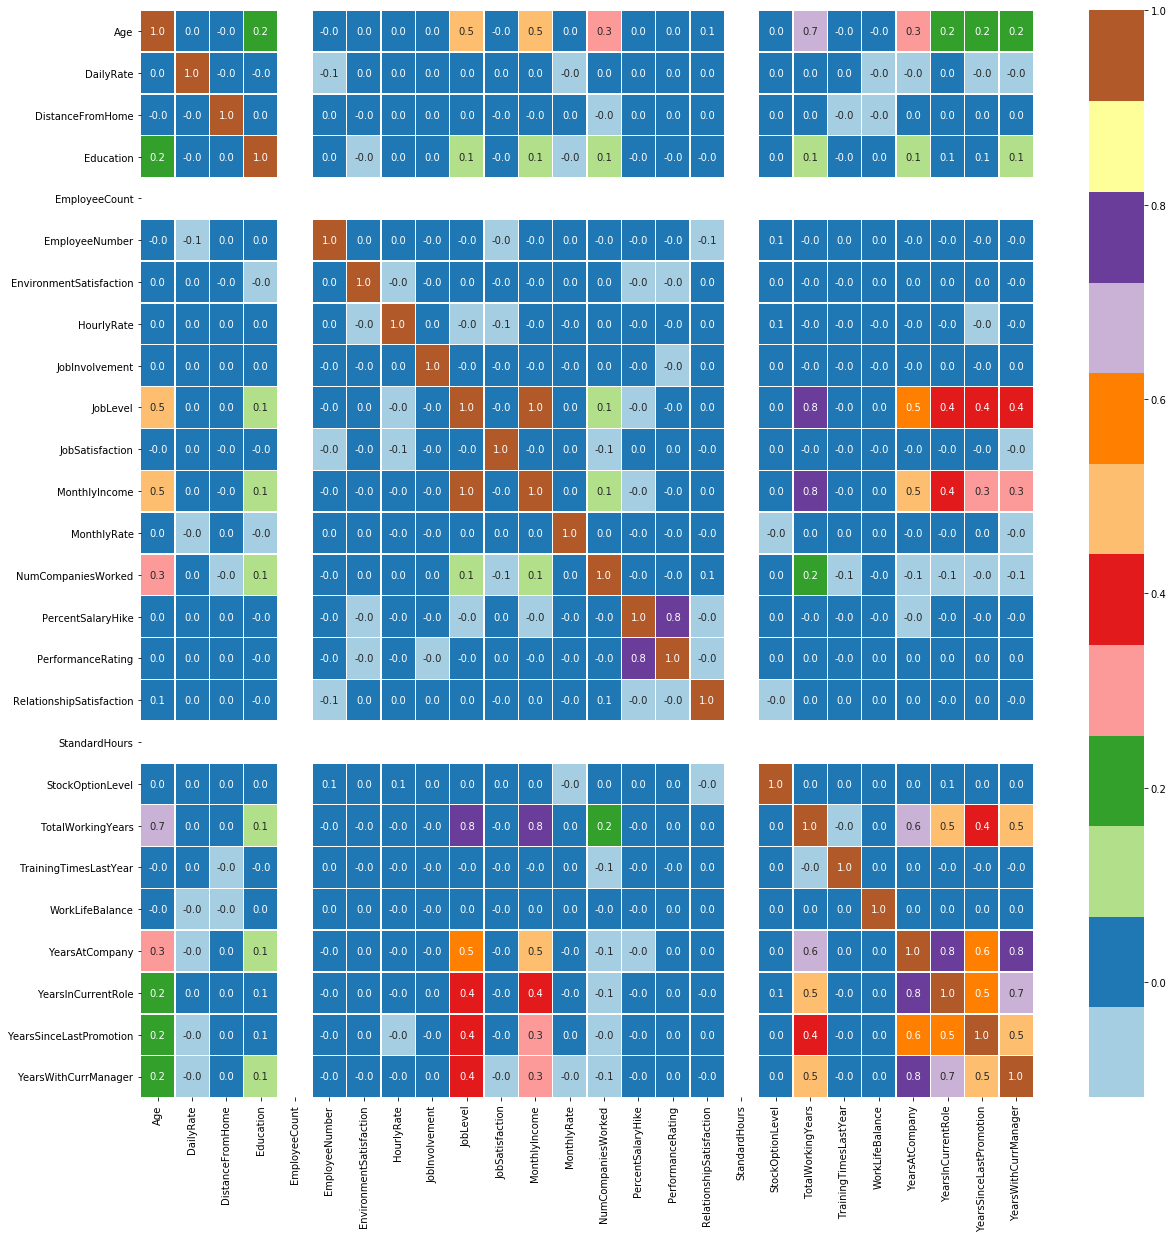

In [12]:
f,ax =  plt.subplots(figsize=(20,20))
sns.heatmap(hr_data.corr(),annot=True,linewidth=.4,ax=ax,fmt='.1f',cmap="Paired")

In [13]:
pd.set_option('display.max_rows',None)
def corrank(hr_data):
        import itertools
        df = pd.DataFrame([[(i,j),hr_data.corr().loc[i,j]] for i,j in list(itertools.combinations(hr_data.corr(), 2))],columns=['pairs','corr'])    
        print(df.sort_values(by='corr',ascending=False))

print(corrank(hr_data))

# prints a descending list of correlation pair (Max on top)

                                                 pairs      corr
190                          (JobLevel, MonthlyIncome)  0.950300
198                      (JobLevel, TotalWorkingYears)  0.782208
259             (PercentSalaryHike, PerformanceRating)  0.773550
227                 (MonthlyIncome, TotalWorkingYears)  0.772893
321             (YearsAtCompany, YearsWithCurrManager)  0.769212
319               (YearsAtCompany, YearsInCurrentRole)  0.758754
323         (YearsInCurrentRole, YearsWithCurrManager)  0.714365
18                            (Age, TotalWorkingYears)  0.680381
306                (TotalWorkingYears, YearsAtCompany)  0.628133
320          (YearsAtCompany, YearsSinceLastPromotion)  0.618409
322      (YearsInCurrentRole, YearsSinceLastPromotion)  0.548056
201                         (JobLevel, YearsAtCompany)  0.534739
230                    (MonthlyIncome, YearsAtCompany)  0.514285
324    (YearsSinceLastPromotion, YearsWithCurrManager)  0.510224
8                        

In [14]:
hr_data['Attrition'] = hr_data['Attrition'].map({'No':0,'Yes':1})

**satisfaction comparison**

In [15]:
# Let's compare the means of our employee Attrition satisfaction against the employee population satisfaction
population_satisfaction = hr_data['JobSatisfaction'].mean()
left_satisfaction = hr_data[hr_data['Attrition']==1]['JobSatisfaction'].mean()

print( 'The mean for the employee population is: ' + str(population_satisfaction) )
print( 'The mean for the employees that had a Attrition is: ' + str(left_satisfaction) )

The mean for the employee population is: 2.7285714285714286
The mean for the employees that had a Attrition is: 2.4683544303797467


#### Conducting the T-Test

In [16]:
 import scipy.stats as stats
 stats.ttest_1samp(a=  hr_data[hr_data['Attrition']==1]['JobSatisfaction'],popmean = population_satisfaction)

Ttest_1sampResult(statistic=-3.582989304028057, pvalue=0.000412552190534359)

#### T-Test Result

#### T-Test Quantile


In [17]:
degree_freedom = len(hr_data[hr_data['Attrition']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9700240104025675
The t-distribution right quartile range is: 1.970024010402567


#### One-Sample T-Test Summary
#### T-Test = 3.58 | P-Value = 0.0004125521 | Reject Null Hypothesis

In [18]:
categorical_col = []
for column in hr_data.columns:
    if hr_data[column].dtype == object and len(hr_data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {hr_data[column].unique()}")
        print("====================================")

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']


BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : The workers who work more hours are likely to quit then others.

In [19]:
hr_data.columns


Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Visulization help us to uderstand our data in detail

#### Age

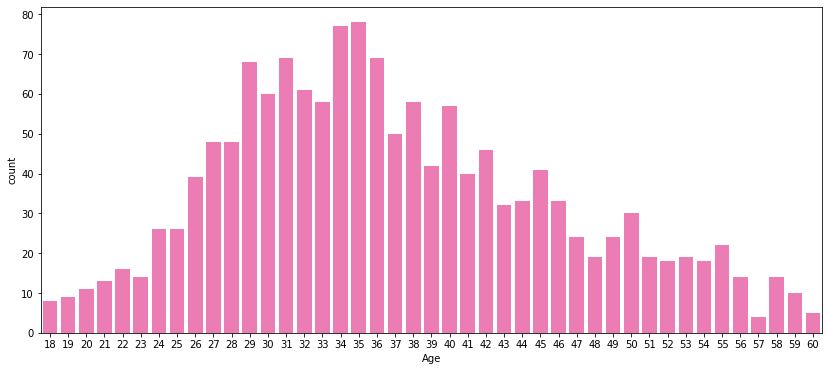

In [20]:
plt.figure(figsize=(14,6))
sns.countplot(hr_data.Age,color='hotpink')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


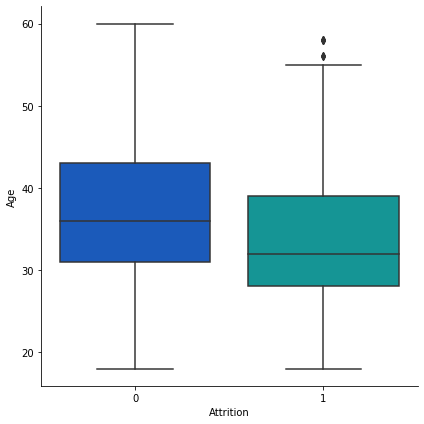

In [21]:
sns.factorplot(data=hr_data,y='Age',x='Attrition',size=6,aspect=1,kind='box',palette='winter')

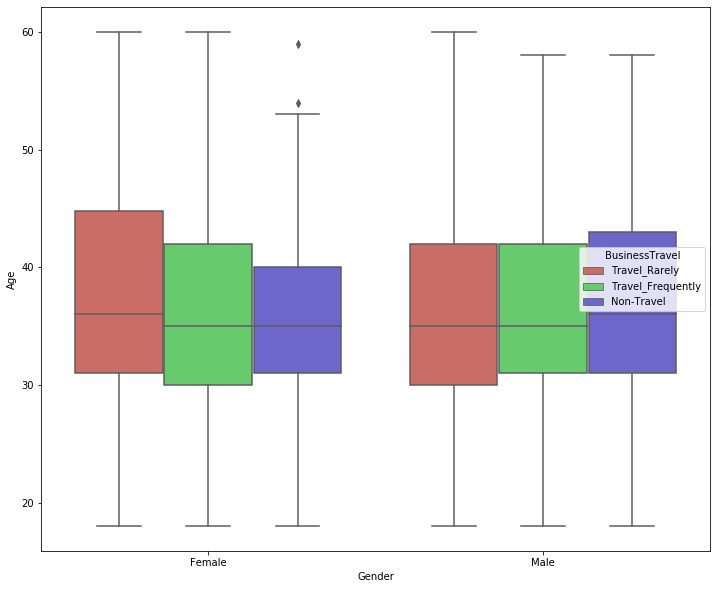

In [22]:
f,ax = plt.subplots(figsize = (12,10))
sns.boxplot(x="Gender",y="Age",hue="BusinessTravel",data=hr_data,palette="hls")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


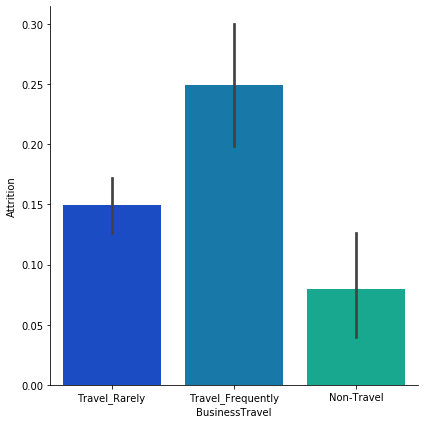

In [23]:
sns.factorplot(data=hr_data,x='BusinessTravel',y='Attrition',size=6,aspect=1,kind='bar',palette='winter')

**BusinessTravel** : The workers who travel alot are more likely to quit then other employees.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


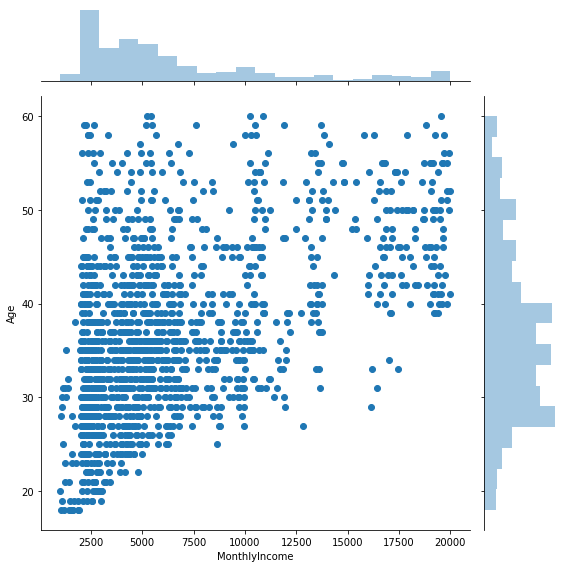

In [24]:
sns.jointplot(hr_data.MonthlyIncome ,hr_data.Age,size=8, kind = "scatter")   
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


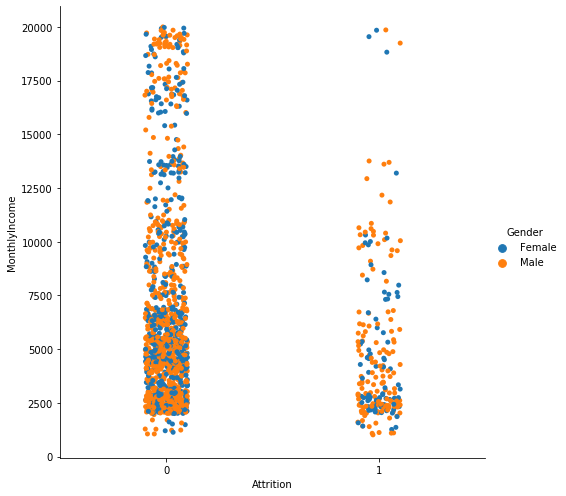

In [25]:
sns.catplot(x="Attrition", y="MonthlyIncome", data=hr_data,hue='Gender',size=7)

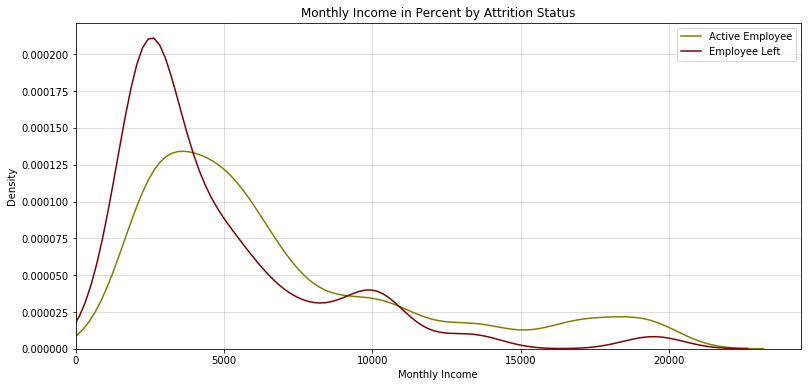

In [26]:
plt.figure(figsize=(13,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hr_data.loc[hr_data['Attrition'] == 0, 'MonthlyIncome'], label = 'Active Employee',color='olive')
sns.kdeplot(hr_data.loc[hr_data['Attrition'] == 1, 'MonthlyIncome'], label = 'Employee Left',color='maroon')
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income in Percent by Attrition Status');

**Monthly Income**: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.

**Year at Company**

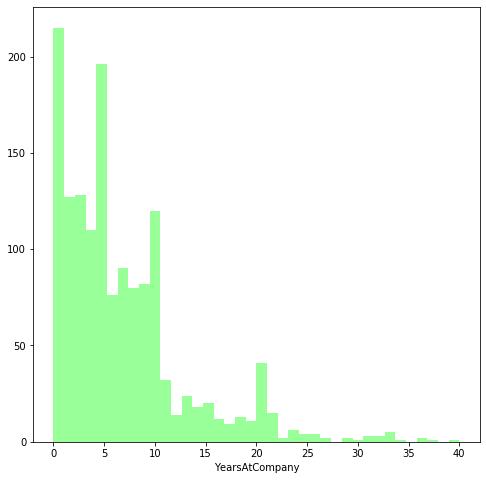

In [27]:
#Distribution of Years at company
plt.figure(figsize=(8,8))
sns.distplot(hr_data["YearsAtCompany"].astype(int),color='lime', kde=False);

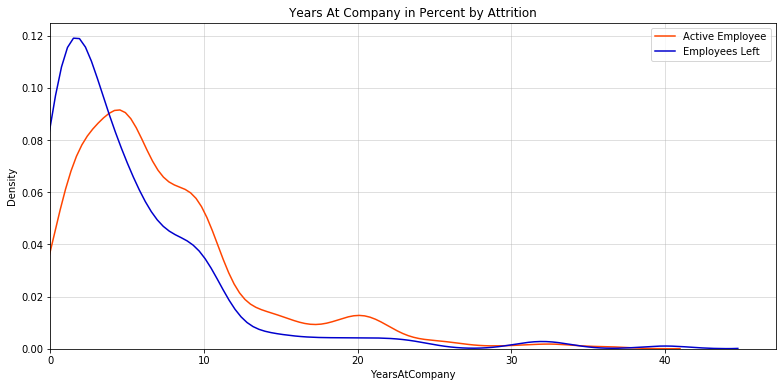

In [28]:
plt.figure(figsize=(13,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hr_data.loc[hr_data['Attrition'] == 0, 'YearsAtCompany'], label = 'Active Employee',color='orangered')
sns.kdeplot(hr_data.loc[hr_data['Attrition'] == 1, 'YearsAtCompany'], label = 'Employees Left',color='mediumblue')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company in Percent by Attrition');

**YearsAtCompany**:  Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.
A strategic "Retention Plan" should be drawn for each Risk Category group..

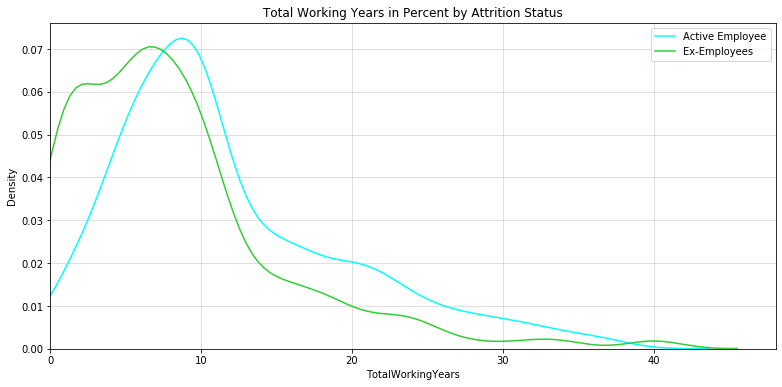

In [29]:
plt.figure(figsize=(13,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hr_data.loc[hr_data['Attrition'] == 0, 'TotalWorkingYears'], label = 'Active Employee',color='cyan')
sns.kdeplot(hr_data.loc[hr_data['Attrition'] == 1, 'TotalWorkingYears'], label = 'Ex-Employees',color='limegreen')
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Total Working Years in Percent by Attrition Status');

**TotalWorkingYears:** The more experienced employees are less likely to leave. Employees who have between 5-8 years of experience should be identified as potentially having a higher-risk of leaving.

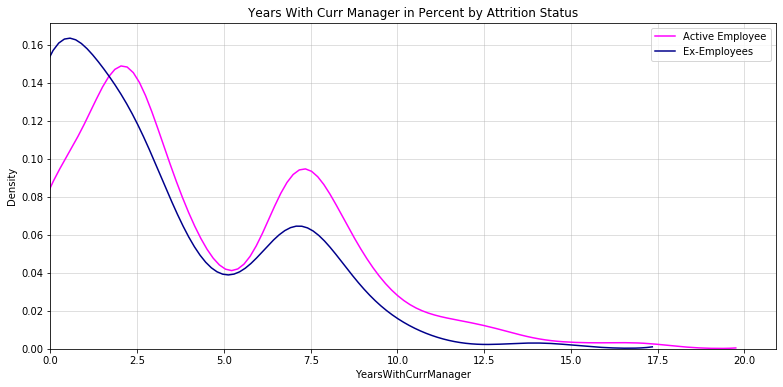

In [30]:
plt.figure(figsize=(13,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hr_data.loc[hr_data['Attrition'] == 0, 'YearsWithCurrManager'], label = 'Active Employee',color='fuchsia')
sns.kdeplot(hr_data.loc[hr_data['Attrition'] == 1, 'YearsWithCurrManager'], label = 'Ex-Employees',color='darkblue')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years With Curr Manager in Percent by Attrition Status');

**YearsWithCurrManager**: A large number of leavers leave 6 months after their Current Managers. By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year. Several metrics can be used here to determine whether action should be taken with a Line Manager:

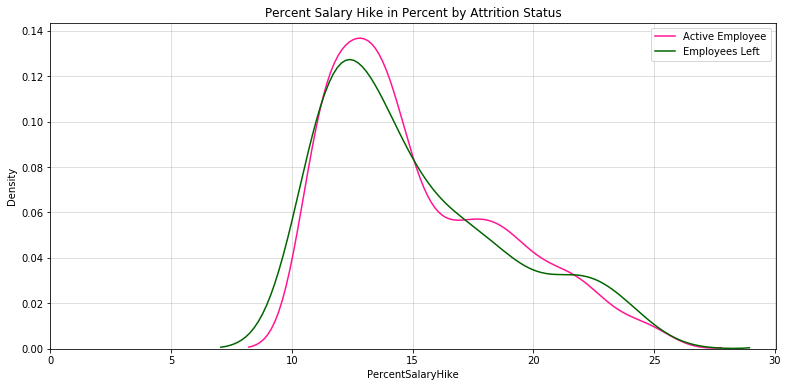

In [31]:
plt.figure(figsize=(13,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hr_data.loc[hr_data['Attrition'] == 0, 'PercentSalaryHike'], label = 'Active Employee',color='deeppink')
sns.kdeplot(hr_data.loc[hr_data['Attrition'] == 1, 'PercentSalaryHike'], label = 'Employees Left',color='darkgreen')
plt.xlabel('PercentSalaryHike')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Percent Salary Hike in Percent by Attrition Status');

Employees got salary hike of 10% to 17%  more chance to leave company

#### Department

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


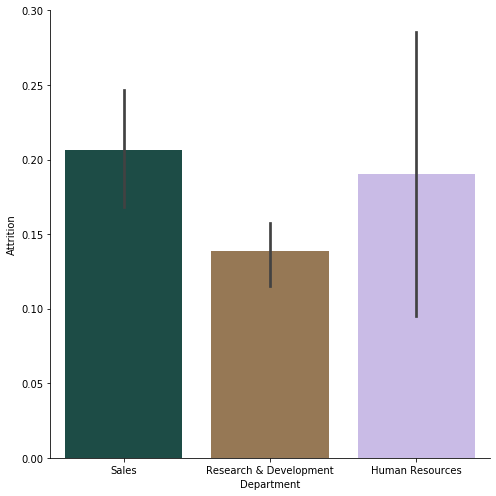

In [32]:
sns.factorplot(data=hr_data,x='Department',y='Attrition',size=7,aspect=1,kind='bar',palette='cubehelix')

**Department :** The worker in Research & Development are more likely to stay then the workers on other departement.

Education

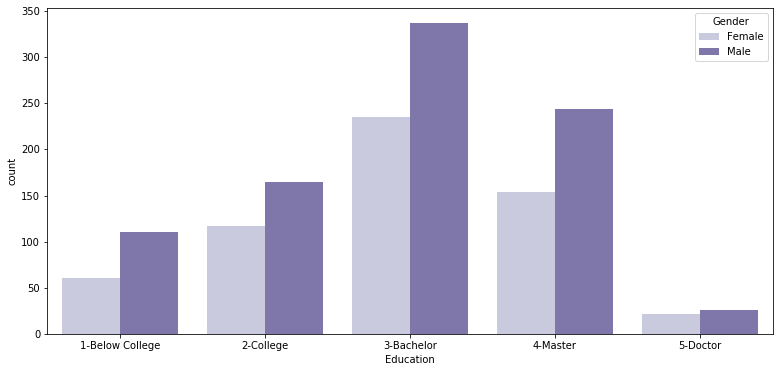

In [33]:
plt.figure(figsize=(13,6))
ax = sns.countplot(data=hr_data,x='Education',hue='Gender',palette='Purples')
ax.set_xticklabels([ '1-Below College' , '2-College' , '3-Bachelor' ,'4-Master',  '5-Doctor'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


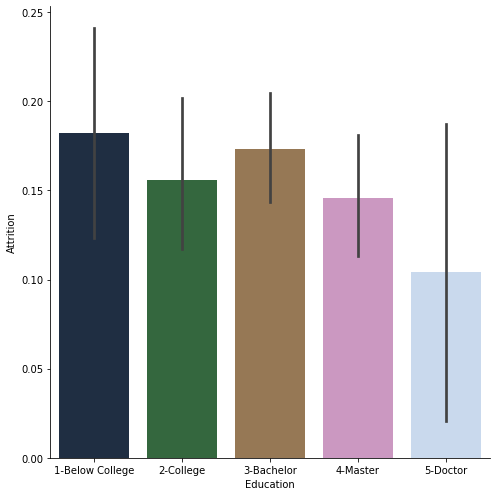

In [34]:
ax=sns.factorplot(data=hr_data,x='Education',y='Attrition',size=7,aspect=1,kind='bar',palette="cubehelix")
ax.set_xticklabels([ '1-Below College' , '2-College' , '3-Bachelor' ,'4-Master',  '5-Doctor'])

Employees qualified as Below college and Bachelor Education tend to leave the company than others.

Text(0.5, 1.0, 'Education Field Counts')

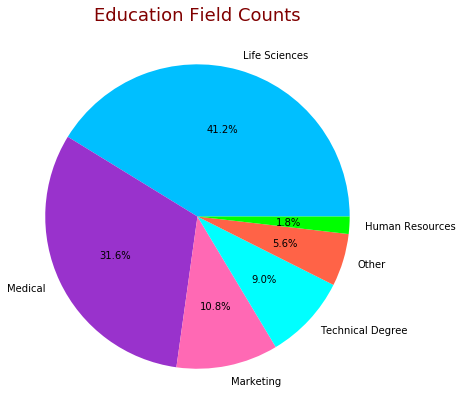

In [35]:
labels=hr_data.EducationField.value_counts().index
sizes=hr_data.EducationField.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=["deepskyblue","darkorchid","hotpink","cyan","tomato","lime"],autopct="%1.1f%%")
plt.title("Education Field Counts",fontsize=18,color='maroon')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


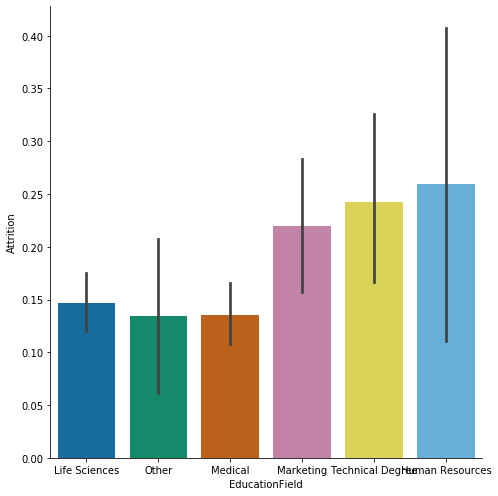

In [36]:
x=sns.factorplot(data=hr_data,x='EducationField',y='Attrition',size=7,aspect=1,kind='bar')


**EducationField **: The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

#### EnvironmentSatisfaction

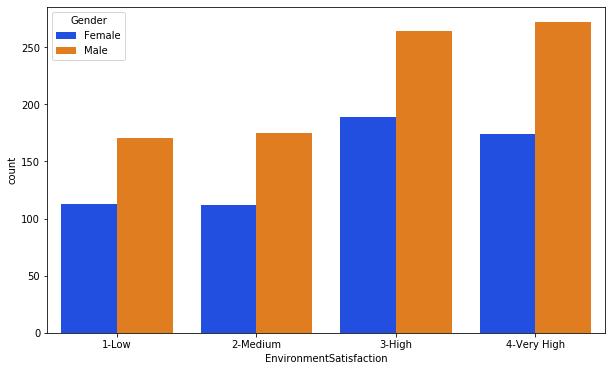

In [37]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=hr_data,x='EnvironmentSatisfaction',hue='Gender',palette='bright')
ax.set_xticklabels([ '1-Low' , '2-Medium' , '3-High' , '4-Very High'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


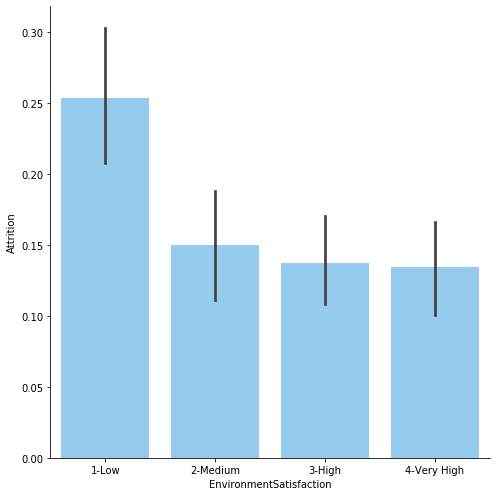

In [38]:
ax=sns.factorplot(data=hr_data,x='EnvironmentSatisfaction',y='Attrition',size=7,aspect=1,kind='bar',color='lightskyblue')
ax.set_xticklabels([ '1-Low' , '2-Medium' , '3-High' , '4-Very High'])

#### Job satisfation

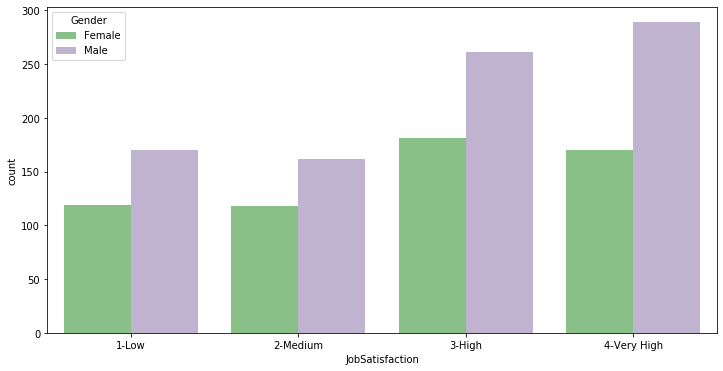

In [39]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=hr_data,x='JobSatisfaction',hue='Gender',palette='Accent')
ax.set_xticklabels([ '1-Low' , '2-Medium' , '3-High' , '4-Very High'])
plt.show()

[Text(0, 0, '1-Low'),
 Text(0, 0, '2-Medium'),
 Text(0, 0, '3-High'),
 Text(0, 0, '4-Very High')]

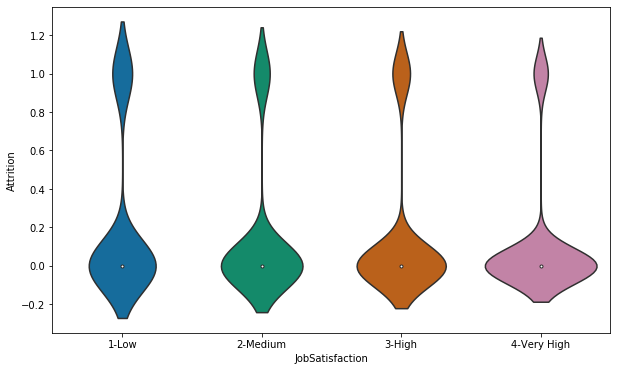

In [40]:
plt.figure(figsize=(10,6))
ax=sns.violinplot(data=hr_data,x='JobSatisfaction',y='Attrition');
ax.set_xticklabels([ '1-Low' , '2-Medium' , '3-High' , '4-Very High'])

Low Environment satisfaction and Job satisfaction  people more likly to leave the company.

#### PerformanceRating

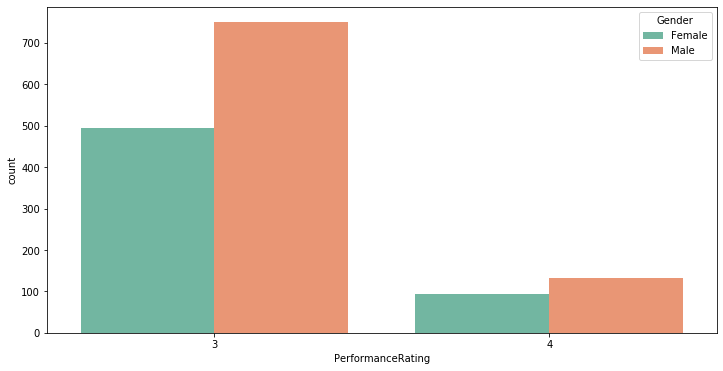

In [41]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=hr_data,x='PerformanceRating',hue='Gender',palette='Set2')
#ax.set_xticklabels( ['1-Low' , '2-Good','3-Excellent' , '4-Outstanding'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


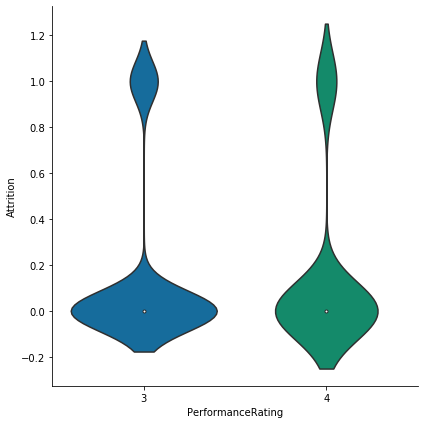

In [42]:
g=sns.factorplot(data=hr_data,x='PerformanceRating',y='Attrition',size=6,aspect=1,kind='violin')

#### Worklife balance

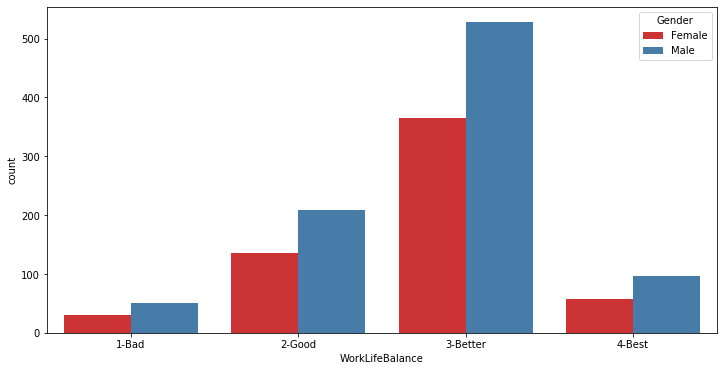

In [43]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=hr_data,x='WorkLifeBalance',hue='Gender',palette='Set1')
ax.set_xticklabels([ '1-Bad', '2-Good', '3-Better', '4-Best'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


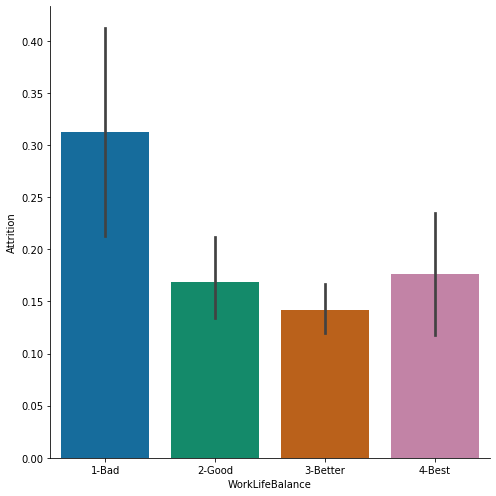

In [44]:
ax=sns.factorplot(data=hr_data,x='WorkLifeBalance',y='Attrition',size=7,aspect=1,kind='bar')
ax.set_xticklabels([ '1-Bad', '2-Good', '3-Better', '4-Best'])

### Job Role vs Monthly Income

In [45]:
income=pd.DataFrame(hr_data.groupby("JobRole").MonthlyIncome.mean().sort_values(ascending=False))

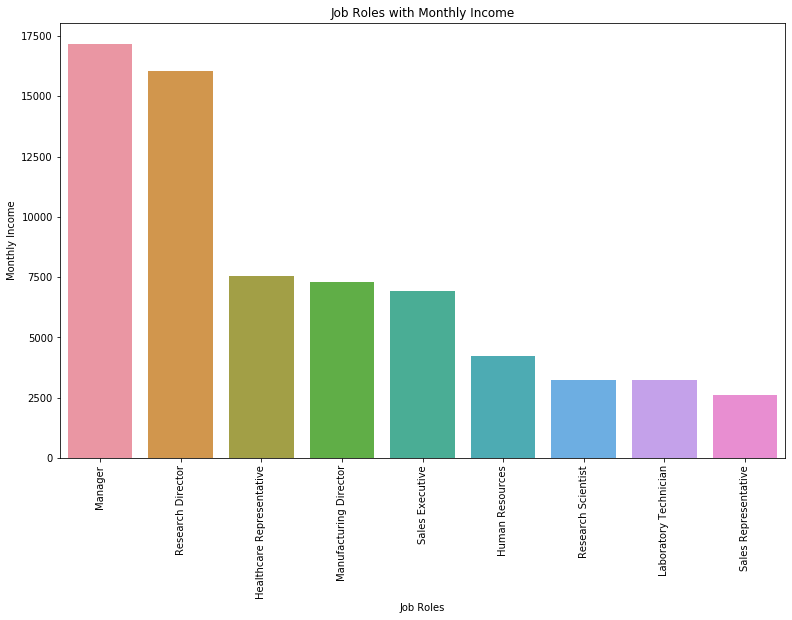

In [46]:

    fig =plt.figure(figsize=(13,8))
    ax=sns.barplot(x=income.index,y=income.MonthlyIncome)
    plt.xticks(rotation=90)
    plt.xlabel("Job Roles")
    plt.ylabel("Monthly Income")
    plt.title("Job Roles with Monthly Income")
plt.show()

### MonthlyIncome and MonthlyRate

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


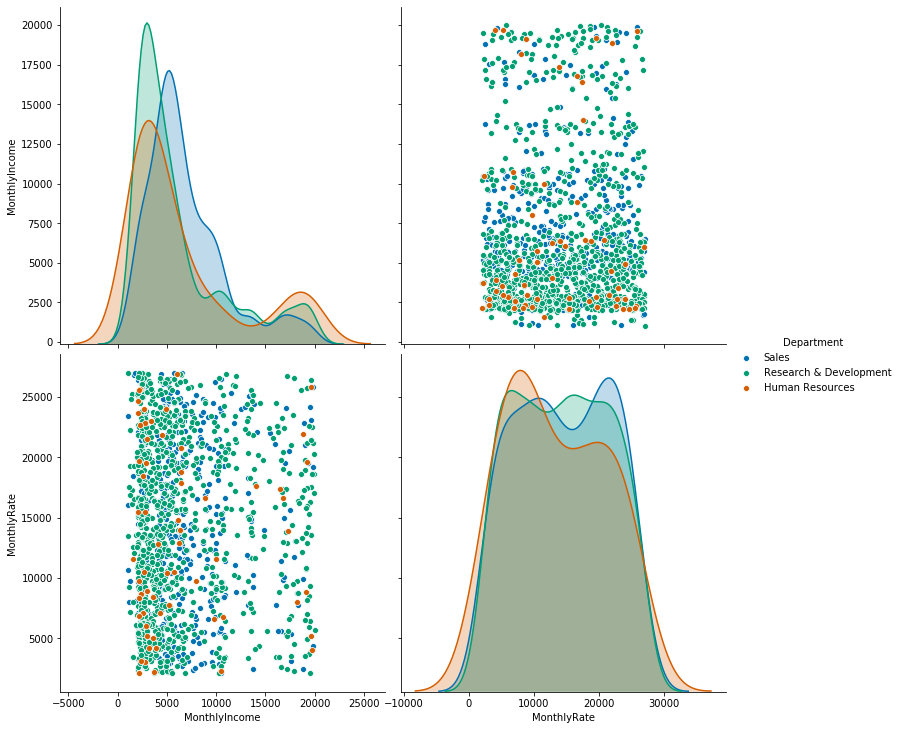

In [47]:
g = sns.pairplot(hr_data, vars=["MonthlyIncome", "MonthlyRate"],hue="Department",size=5)

#### Years at Company

#### Distance from Home

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


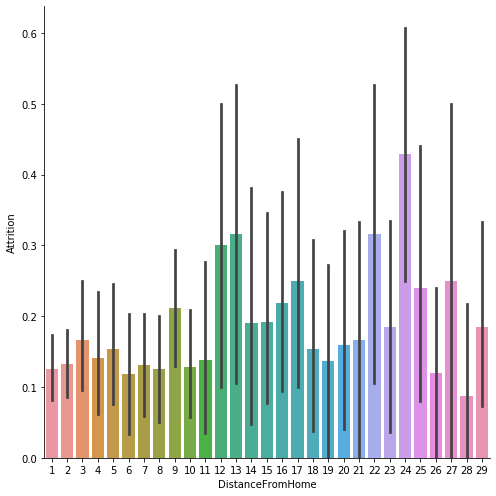

In [48]:
sns.factorplot(data=hr_data,y='Attrition',x='DistanceFromHome',size=7,aspect=1,kind='bar')

People who live further away from their work show higher proportion of leavers compared to their counterparts.

### TotalWorkingYears vs YearsAtCompany

<Figure size 720x720 with 0 Axes>

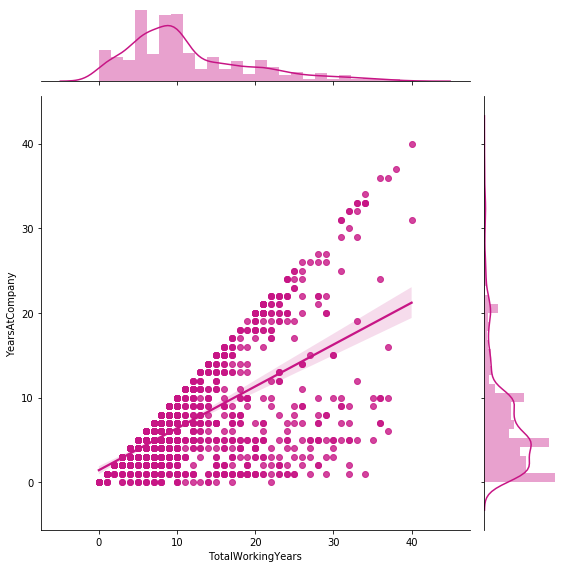

In [49]:
plt.figure(figsize=(10,10))
sns.jointplot(x=hr_data['TotalWorkingYears'], y=hr_data['YearsAtCompany'],kind='reg',
              height=8,color= 'mediumvioletred')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


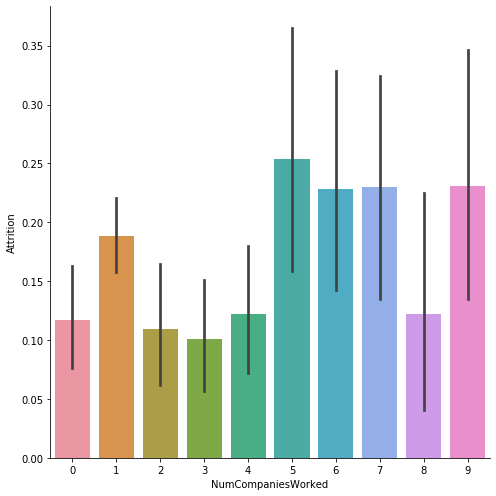

In [50]:
sns.factorplot(data=hr_data,y='Attrition',x='NumCompaniesWorked',size=7,aspect=1,kind='bar')

People who worked more companies are likly to leave

#### Hourly rate


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


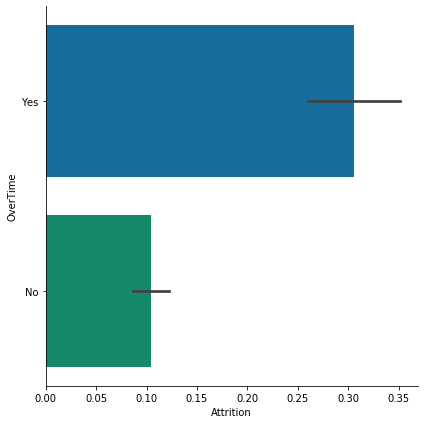

In [51]:
sns.factorplot(data=hr_data,y='OverTime',x='Attrition',size=6,aspect=1,kind='bar')

**Over Time**: people who work overtime are more likelty to leave the company. Hence efforts must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.

### Monthly Income vs Job role,Job Level,Department

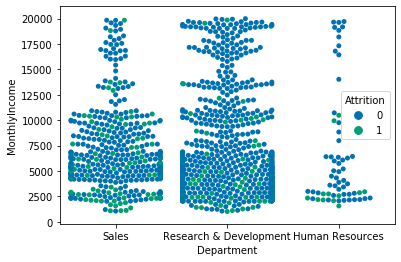

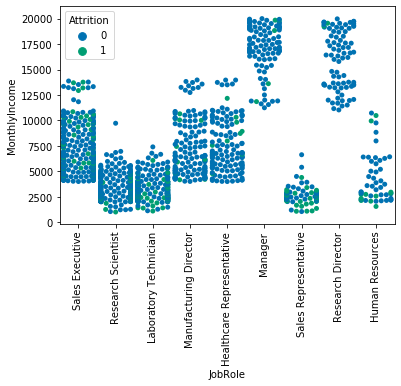

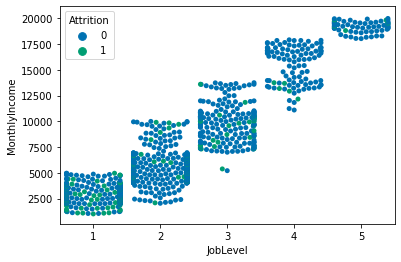

In [52]:
sns.swarmplot(x="Department", y="MonthlyIncome", hue="Attrition", data=hr_data);
plt.show()

sns.swarmplot(x="JobRole", y="MonthlyIncome", hue="Attrition", data=hr_data);
plt.xticks( rotation=90 )
plt.show()


sns.swarmplot(x="JobLevel", y="MonthlyIncome", hue="Attrition", data=hr_data);
plt.show()

In [53]:
age=pd.DataFrame(hr_data.groupby("Age")[["MonthlyIncome","DailyRate","MonthlyRate",'HourlyRate']].mean())
age["Count"]=hr_data.Age.value_counts(dropna=False)
age.reset_index(level=0, inplace=True)
age.head()

,Age,MonthlyIncome,DailyRate,MonthlyRate,HourlyRate,Count
0,18,1518.375000,747.625000,14476.000000,68.125000,8
1,19,2075.000000,548.444444,15119.666667,63.555556,9
2,20,2539.363636,819.454545,16480.909091,61.909091,11
3,21,2491.461538,762.846154,17268.923077,67.307692,13
4,22,2950.000000,806.937500,14424.125000,69.812500,16


Text(0.5, 1.0, 'General Statistics of Rate')

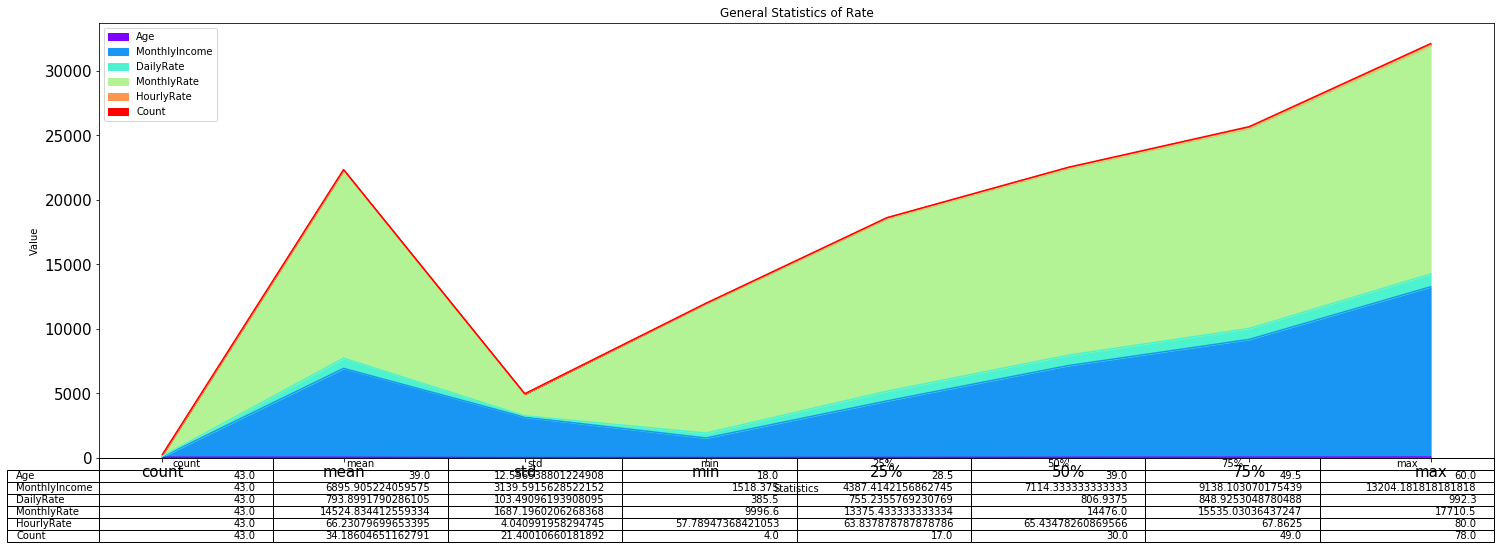

In [54]:
age.describe().plot(kind = "area",fontsize=15, figsize = (25,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Rate")

#### YearsInCurrentRole vs YearsAtCompany

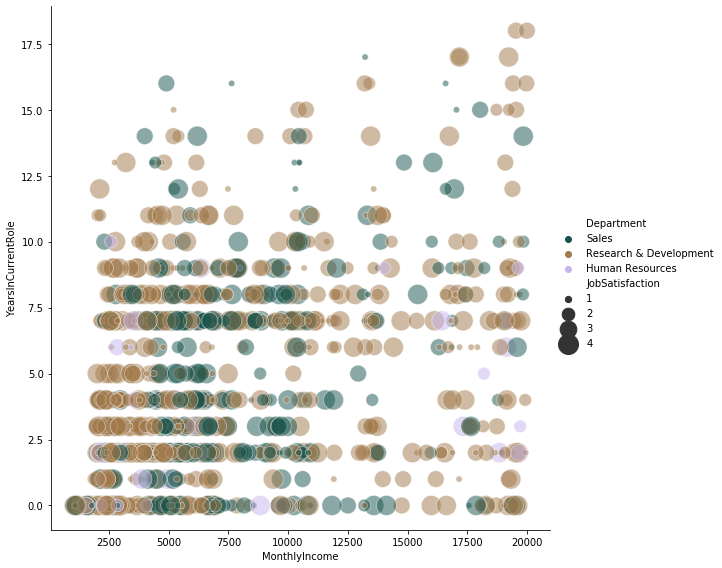

In [55]:
sns.relplot(y="YearsInCurrentRole", x="MonthlyIncome", hue='Department', size="JobSatisfaction",
            sizes=(40, 400), alpha=.5,  palette="cubehelix",
            height=8, data=hr_data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


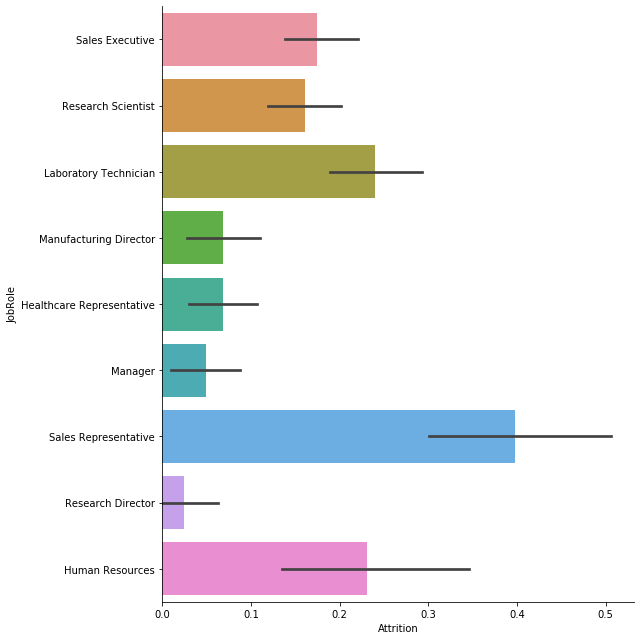

In [56]:
sns.catplot(y="JobRole",x="Attrition", kind="bar",size=9, data=hr_data);

**JobRole** : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

### Overtime

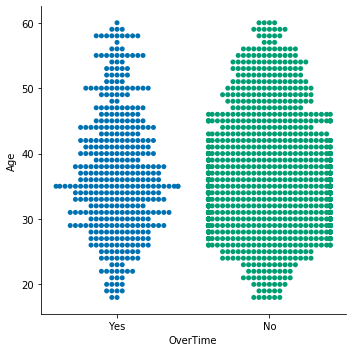

In [57]:
sns.catplot(x="OverTime", y="Age", kind="swarm", data=hr_data);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


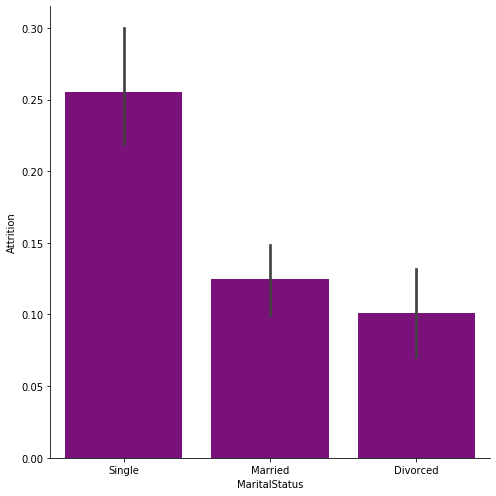

In [58]:
sns.catplot(x="MaritalStatus", y="Attrition", kind="bar",size=7, data=hr_data,color='darkmagenta');

**MaritalStatus **: The workers who have Single marital status are more likely to quit the Married, and Divorced.

### Create Model

### Preparing DataSet

#### Feature Encoding

We use Label Encoder to encode categorical labels with numerical values.

In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [60]:
hr_data.shape

(1470, 35)

 Label Encoding will be used for columns with 2 or less unique values

In [61]:
le_count = 0
for col in hr_data.columns[1:]:
    if hr_data[col].dtype == 'object':
        if len(list(hr_data[col].unique())) <= 2:
            le.fit(hr_data[col])
            hr_data[col] = le.transform(hr_data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

3 columns were label encoded.


In [62]:
# convert rest of categorical variable into dummy
hr_data = pd.get_dummies(hr_data, drop_first=True)

In [63]:
hr_data.shape

(1470, 49)

In [64]:
hr_data.head(3)

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,41,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,0,1,0,0,1
1,0,49,279,8,1,1,2,3,1,61,...,0,0,0,0,0,1,0,0,1,0
2,1,37,1373,2,2,1,4,4,1,92,...,0,1,0,0,0,0,0,0,0,1


### Mo0delling on logistic Regression and finding the accuracy of model

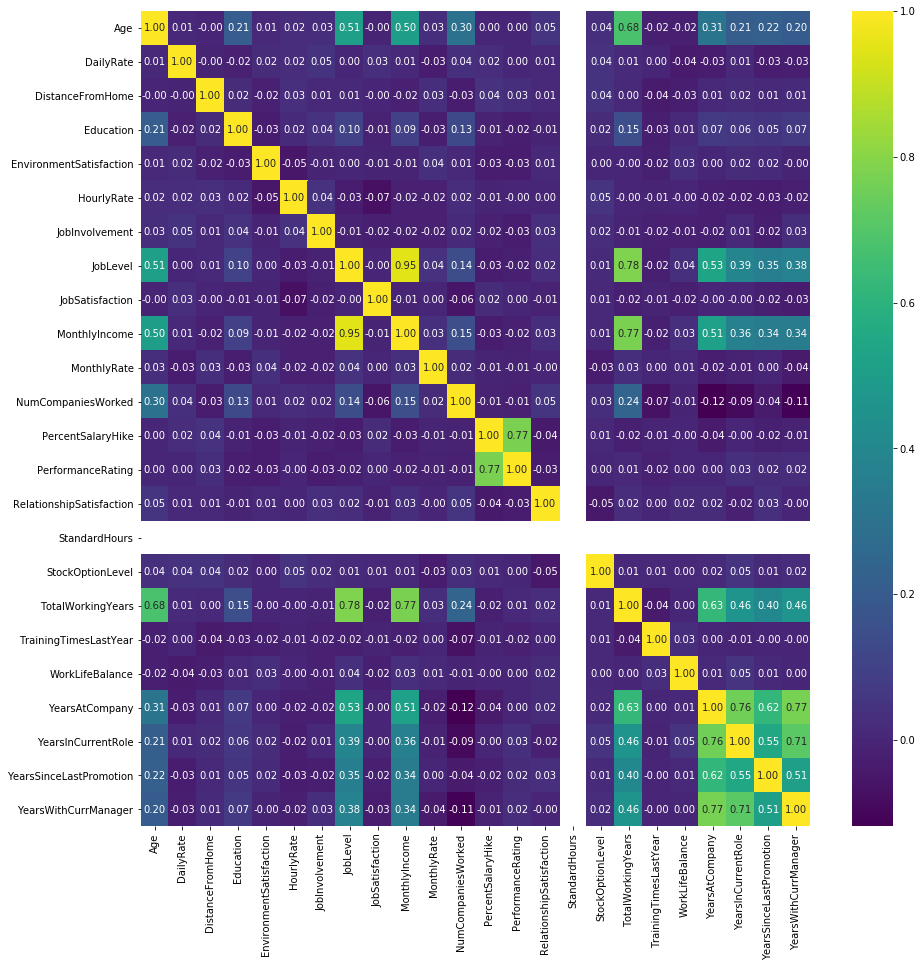

In [65]:
X=data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=data[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [70]:
X=data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=data[['Attrition']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.858
Test Model accruracy scores: 0.845
--------------------------------------------------------------------------


## Model Generated is having the 85% accuracy so that the employee will stay 